## **Project 2**

## Simulating polarisation of light on a quantum computer

In this, we will use quantum computing to simulate a toy model of photon polarisation.


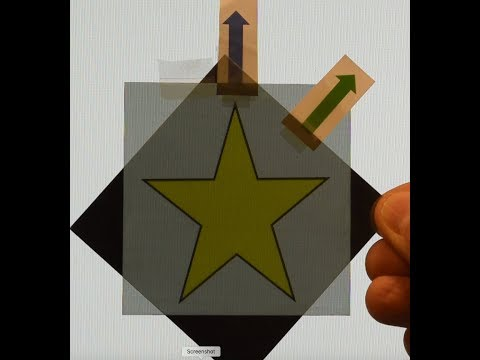

In [8]:
from IPython.display import YouTubeVideo, display
polariser_exp = YouTubeVideo('6N3bJ7Uxpp0', end=93, height=405, width=720, modestbranding=1)
display(polariser_exp)

To simulate the action of a polariser on plane-polarised light, we have to somehow map the problem onto the Bloch sphere. Here is one way to do it. As in the video, the light exiting the first polariser is plane-polarised, which means it is polarised in a plane at some angle to the horizontal and vertical axes. After that, the second polariser essentially _projects_ this onto the pass-axis orientation of the polariser, which can be seen as a kind of measurement. So in our quantum circuit, we will consider only this part of the experiment, and see what fraction of the plane polarised light is transmitted through the second polariser as a function of their relative orientation.

To do this, we need to consider only plane-polarised light. Let us assume that the light exiting the first polarizer is horizontally polarised. We know that if we place the second polariser with it's pass-axis vertical, no light will be transmitted. So these two states are orthogonal. Let us map these two states to $|0\rangle$ and $|1\rangle$ respectively (since these are also orthogonal). However, note that while the angle between the two orthogonal polarisation states is $\pi/2$, the angle on the Bloch sphere between $|0\rangle$ and $|1\rangle$ is $\pi$. We know that any other orientation of linearly polarised light can be written as a superposition of these two basis vectors. Moreover, since we are only considering linearly polarised light, we know that the relative phase is $0$. So we can restrict ourselves to the great circle on the Bloch sphere passing through $|0\rangle$, $|+\rangle$, $|1\rangle$ and $|-\rangle$. 


## **Problem**

For this experiment, we will need to create a parameterised circuit, where the rotation angle is a parameter. Qiskit enables this using `Parameter()`. We will define a parameter $\beta$ which is the relative angle between the two polarisers. A quantum circuit where the qubit starts in the $|0\rangle$ state, is equivalent of horizontally plane polarised light. Change the measurement basis using a rotation gate with an angle of rotation in terms of the variable `beta` and measure in this basis. This basis change should correspond to rotating the second polariser by an angle $\beta$. Compare the theoretical and output transimission probabilities. 

In [1]:
#Importing Python libraries and standard Qiskit libraries

%matplotlib inline
import hashlib
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import HGate

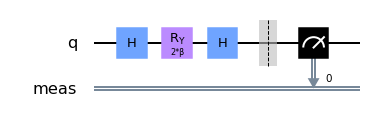

In [2]:
#Implementation of Quantum Circuit for the Problem

beta = Parameter('β')
qc2 = QuantumCircuit(1)

qc2.h(0)
qc2.ry(2*beta,0)
qc2.h(0)
qc2.measure_all()

qc2.draw(output='mpl')

In [4]:
# Defining of theoretical transmission probability. 
#The expression for transmitted probability between two polarisers with a relative angle `beta` given in radians

def theoretical_prob(beta):
    tp = np.cos(beta)**2
    return tp

We will now rotate the second polariser through an angle of  𝜋 . This means that  0≤𝛽≤𝜋 . We can repeat this experiment for  𝛽  values in this range and count the number of times we measured a photon passing through the second polariser.

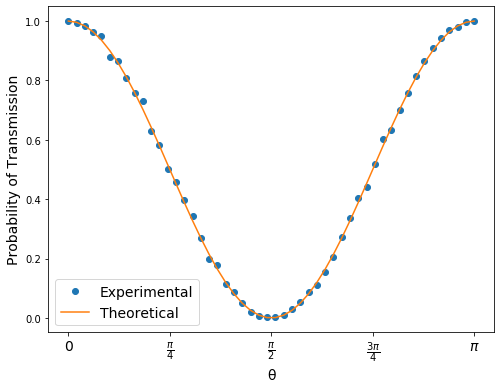

In [7]:
#To compare the theoretical and experimental results

beta_range = np.linspace(0, np.pi, 50)

num_shots = 1024

basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'barrier', 'measure']

job = execute(qc2,
              backend=QasmSimulator(),
              shots = num_shots,
              parameter_binds=[{beta: beta_val} for beta_val in beta_range], 
              seed_simulator=0) # For consistent results

counts = job.result().get_counts()

# Calculating the probability of photons passing through
probabilities = list(map(lambda c: c.get('0', 0)/num_shots, counts))

pol_checks = [Statevector.from_instruction(qc2.bind_parameters({beta: beta_val})
            .remove_final_measurements(inplace=False))
            .equiv(Statevector([np.cos(-beta_val), np.sin(-beta_val)]))
            for beta_val in beta_range]

answer2 = hashlib.sha256((str(probabilities)+str(pol_checks)).encode()).hexdigest()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(beta_range, probabilities, 'o', label='Experimental')
ax.plot(beta_range, theoretical_prob(beta_range), '-', label='Theoretical')

ax.set_xticks([i * np.pi / 4 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Probability of Transmission', fontsize=14)
ax.legend(fontsize=14)